In [1]:
from azureml import Workspace
ws = Workspace()
experiment = ws.experiments['a757aa0def6b4caeb21c49fc49383b37.f-id.6d5aa56a1948430b8b9a6de6f01fae1e']
ds = experiment.get_intermediate_dataset(
    node_id='6cae5247-5c5d-484e-8390-fdc69c9df15e-38007',
    port_name='Results dataset',
    data_type_id='GenericCSV'
)
frame = ds.to_dataframe()

In [2]:
frame.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,airport_id_x,airport_id_y
count,2719397.0,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.691956e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06,2.719397e+06
mean,2013.0,6.979968e+00,1.579747e+01,3.898389e+00,1.274226e+04,1.274246e+04,1.326647e+03,1.043062e+01,2.023432e-01,1.505272e+03,6.566923e+00,2.166318e-01,1.067516e-02,1.274226e+04,1.274246e+04
std,0.0,1.984330e+00,8.799863e+00,1.985988e+00,1.501976e+03,1.501968e+03,4.713755e+02,3.593247e+01,4.017468e-01,4.939662e+02,3.844812e+01,4.119497e-01,1.027677e-01,1.501976e+03,1.501968e+03
min,2013.0,4.000000e+00,1.000000e+00,1.000000e+00,1.014000e+04,1.014000e+04,1.000000e+00,-6.300000e+01,0.000000e+00,1.000000e+00,-9.400000e+01,0.000000e+00,0.000000e+00,1.014000e+04,1.014000e+04
25%,2013.0,5.000000e+00,8.000000e+00,2.000000e+00,1.129200e+04,1.129200e+04,9.200000e+02,-4.000000e+00,0.000000e+00,1.120000e+03,-1.100000e+01,0.000000e+00,0.000000e+00,1.129200e+04,1.129200e+04
50%,2013.0,7.000000e+00,1.600000e+01,4.000000e+00,1.289200e+04,1.289200e+04,1.320000e+03,-1.000000e+00,0.000000e+00,1.528000e+03,-3.000000e+00,0.000000e+00,0.000000e+00,1.289200e+04,1.289200e+04
75%,2013.0,9.000000e+00,2.300000e+01,6.000000e+00,1.405700e+04,1.405700e+04,1.725000e+03,9.000000e+00,0.000000e+00,1.918000e+03,1.000000e+01,0.000000e+00,0.000000e+00,1.405700e+04,1.405700e+04
max,2013.0,1.000000e+01,3.100000e+01,7.000000e+00,1.537600e+04,1.537600e+04,2.359000e+03,1.863000e+03,1.000000e+00,2.359000e+03,1.845000e+03,1.000000e+00,1.000000e+00,1.537600e+04,1.537600e+04


/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


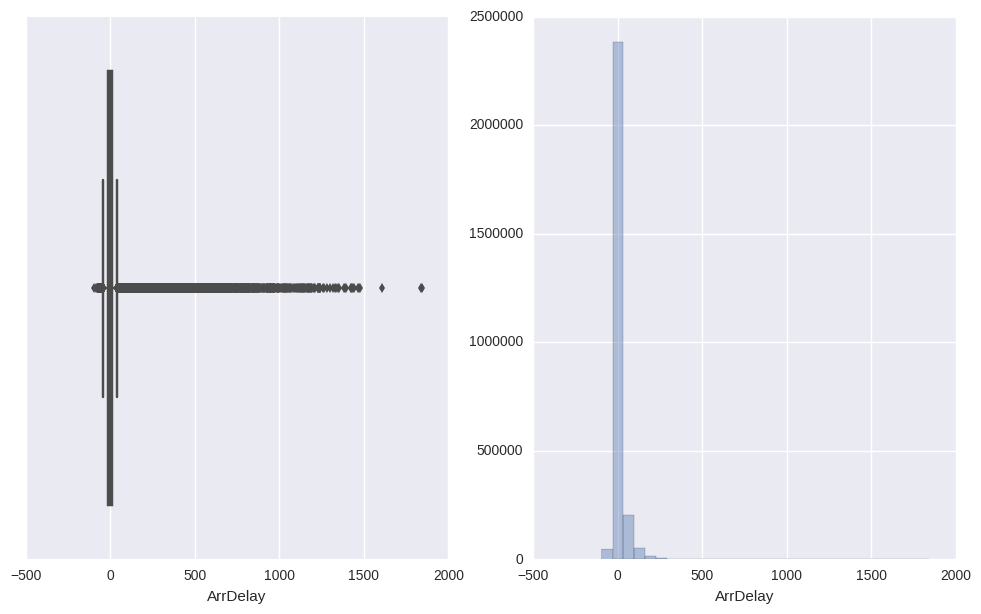

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize= (12, 7))


sns.boxplot(x = 'ArrDelay', data = frame, ax = ax[0])
sns.distplot(frame['ArrDelay'], bins = 30, ax = ax[1], kde = False)


In [4]:
def cond_plot(df, cols):    
    import matplotlib.pyplot as plt
    import seaborn as sns
    for col in cols:
        grid = sns.FacetGrid(df, col = 'ArrDel15')
        grid.map(plt.hist, col, alpha = 0.7)
    

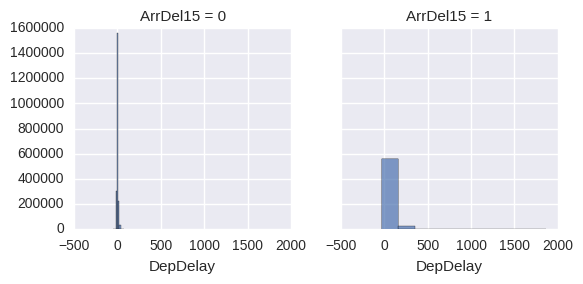

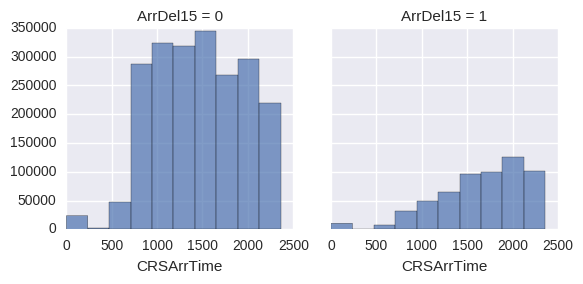

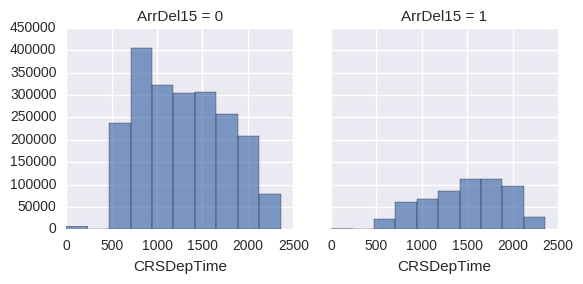

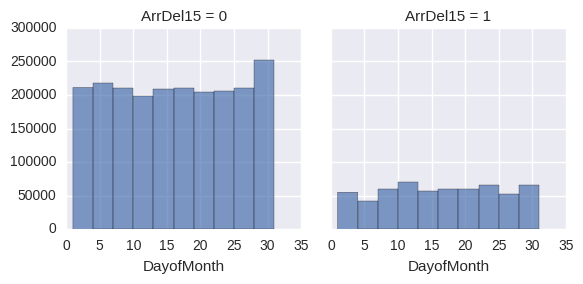

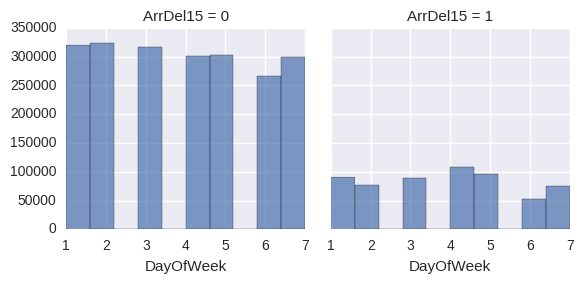

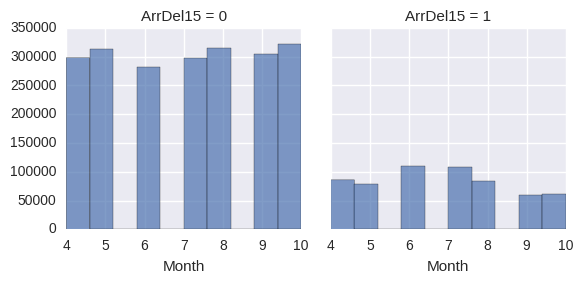

In [5]:
cond_plot(frame, ['DepDelay', 'CRSArrTime', 'CRSDepTime', 'DayofMonth', 'DayOfWeek', 'Month'])

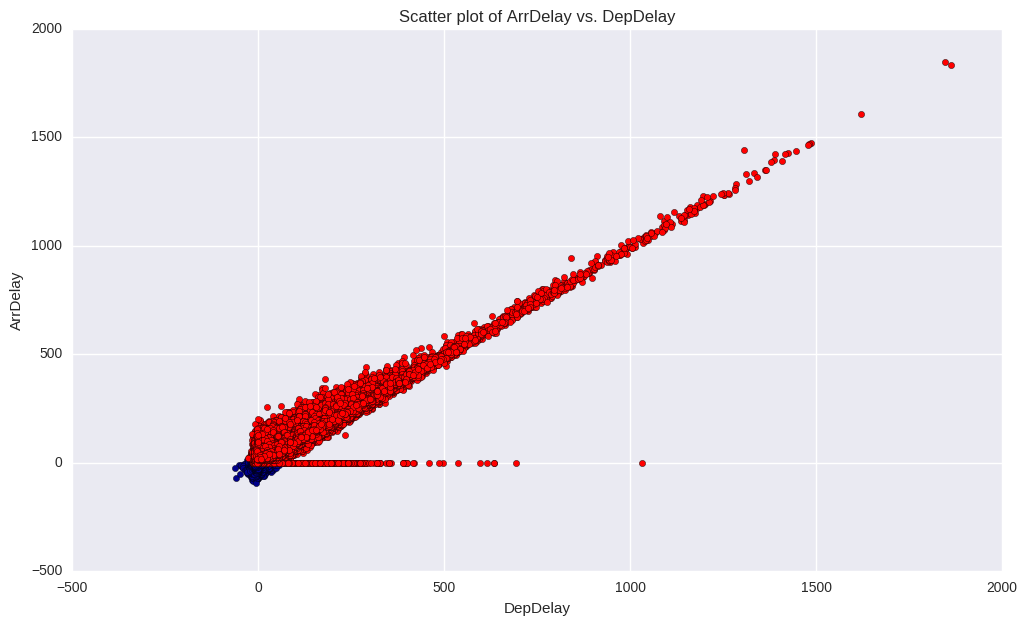

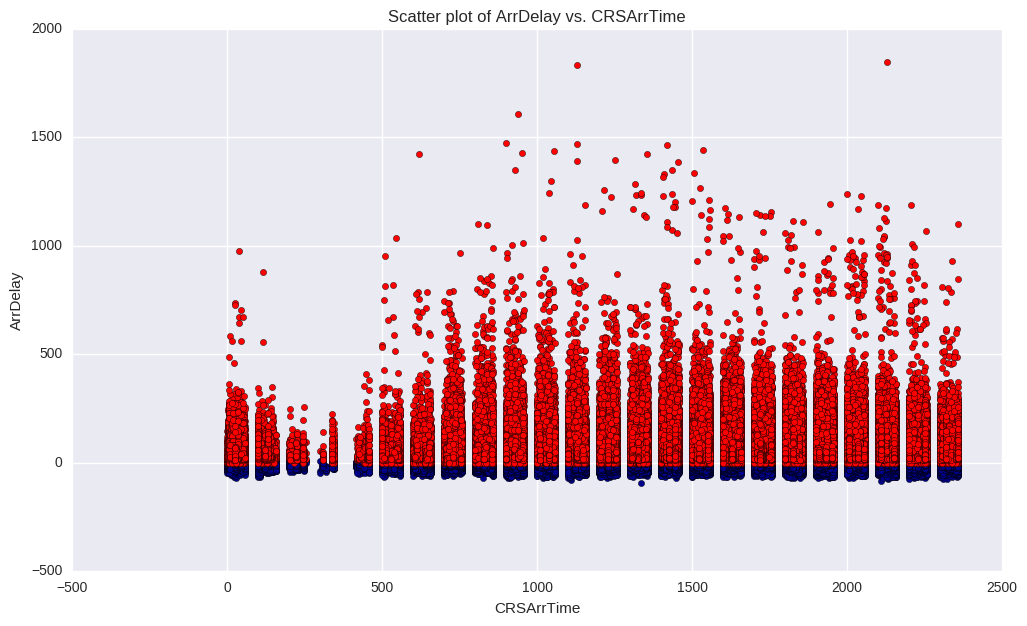

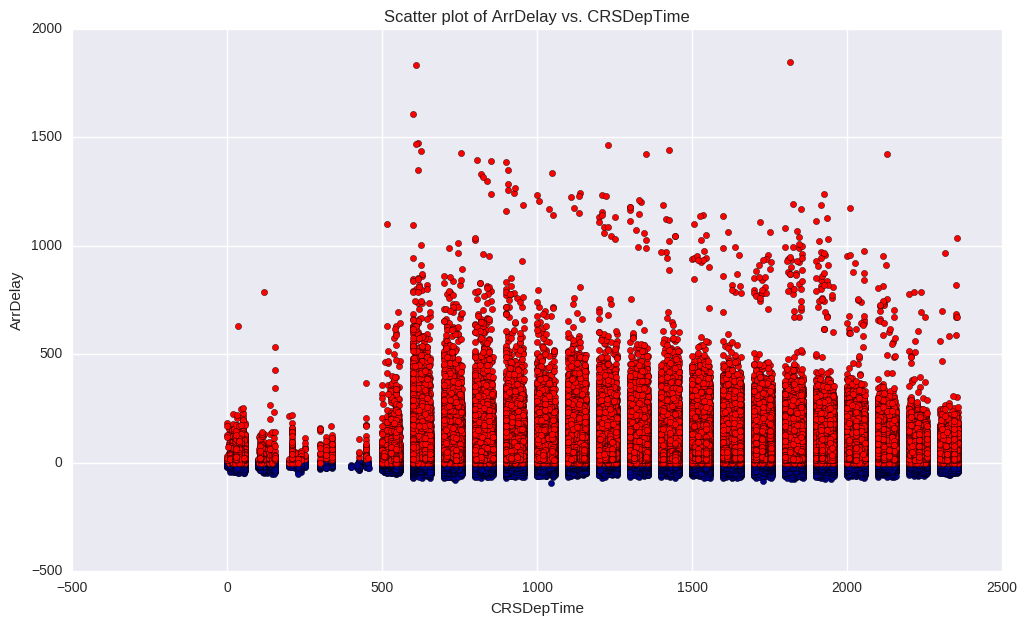

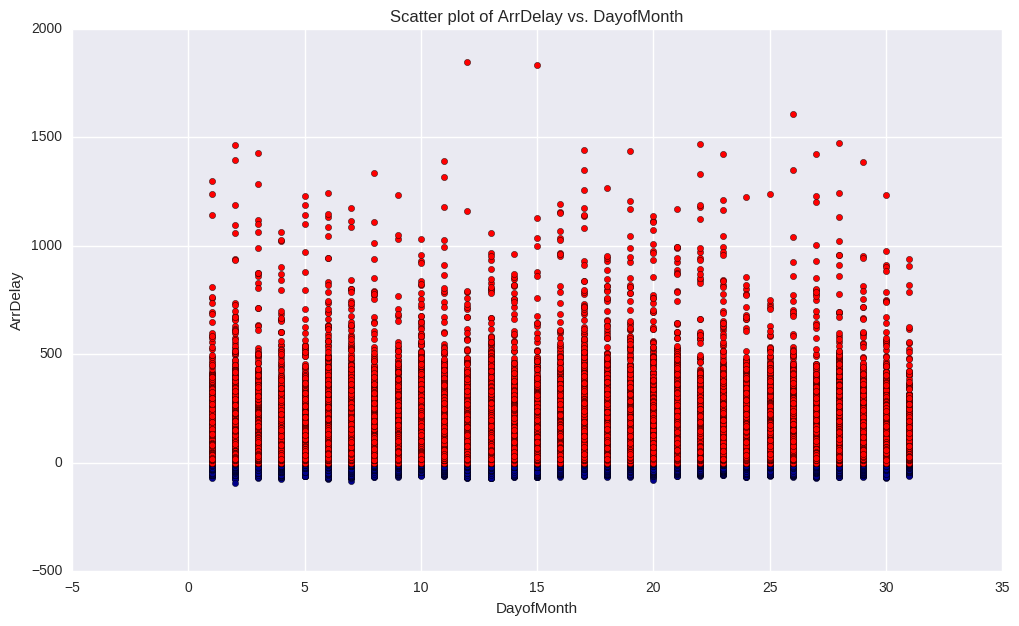

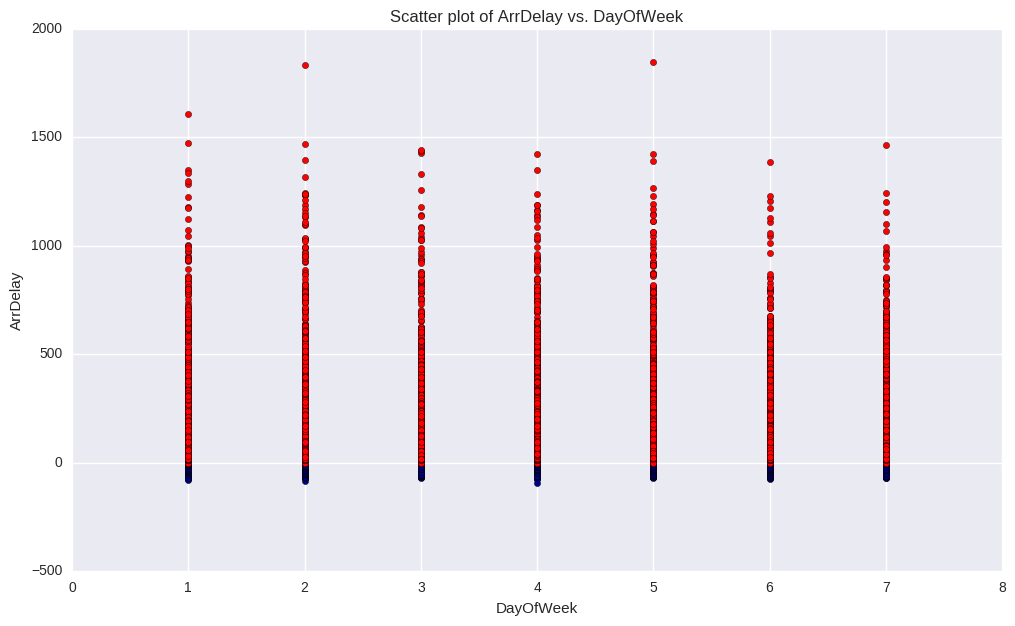

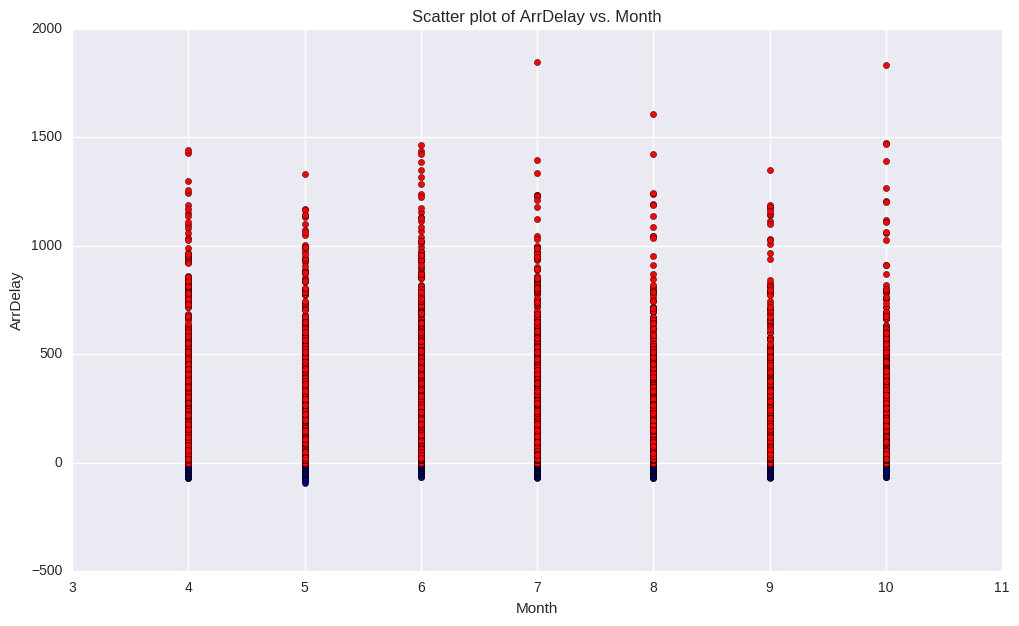

In [8]:
cols = ['DepDelay', 'CRSArrTime', 'CRSDepTime', 'DayofMonth', 'DayOfWeek', 'Month']
delaylt15 = frame[frame['ArrDel15'] == 0]
delaygt15 = frame[frame['ArrDel15'] == 1]
for col in cols:
    fig = plt.figure(figsize = (12, 7))
    ax = fig.gca()
    delaylt15.plot(kind = 'scatter', color = 'DarkBlue', x = col, y = 'ArrDelay', ax = ax)
    delaygt15.plot(kind = 'scatter', color = 'Red', x = col, y = 'ArrDelay', ax = ax)
    ax.set_title('Scatter plot of ArrDelay vs. ' + col)
    